

# Project on House Prices - Advanced Regression Techniques
## Predict sales prices and practice feature engineering, RFs, and gradient boosting

### https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

## -----------------------------------------------S  T  A  R  T--------------------------------------------------------

# Sec-I
## Imorting modules
## Loading of Dataset
## Checking of Dataset ---> Nos. of Features, Datatypes of Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
os.getcwd()


'C:\\Users\\sahar\\OneDrive\\Documents\\DataScience_LB\\LB_DSC_Modules\\02_Stats+ML\\02_Stats+ML_16APR_Classes\\Project-1_HousePricesAdv'

In [2]:
# Loading Train Dataset

train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Loading Test Dataset

test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print('Shape of Train Data: ', train_data.shape)
print('Shape of Test Data: ', test_data.shape)

Shape of Train Data:  (1460, 81)
Shape of Test Data:  (1459, 80)


In [5]:
# Merging train and Test dataset and separating response variable

y = train_data.SalePrice
train_data.drop(columns='SalePrice', inplace=True)
dataset = pd.concat([train_data, test_data])

print('Shape of Merged Dataset: ', dataset.shape)
print('Shape of Response Dataframe: ', y.shape)

Shape of Merged Dataset:  (2919, 80)
Shape of Response Dataframe:  (1460,)


In [6]:
# Preparing Submission DataFrame and dropping 'Id' from merged dataset

sub_data = pd.DataFrame()
sub_data['Id'] = test_data.Id

dataset.drop('Id', axis=1, inplace=True)
dataset.shape

(2919, 79)

In [7]:
# Checking of info of main dataframe after dropping Sr. No. Col

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Sec-II
# Handling of Missing Values

### a) Splitting of Dataset into Categorical & Numerical Features
### b) Checking of Ordinal Categorical Variables in Numerical Features
### c) Combining Ordinal Features into Categorical Features and exclusion of the same from Numerical Dataframe
### d) Handling of missing values in Categorical Dataframe
### e) Handling of missing values in Numerical Dataframe

In [8]:
# Spliting the main dataframe as per types namely : Categorical and Continuous Data

categorical_data = dataset.loc[:, dataset.dtypes==np.object]
numerical_data = dataset.loc[:, dataset.dtypes!=np.object]

# Checking the shapes of 2 new dataframes created 

print(categorical_data.shape)
print(numerical_data.shape)

(2919, 43)
(2919, 36)


In [9]:
# By checking total number of features it seems the main dataframe is splitted properly between 2 new dataframes

# checking of features in numerical dataframe
print(numerical_data.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [10]:
# Now in numerical variable we must look for Categorical Ordinal Variable (as some of these variable may be number format)
# Checking the number of unique values present in each numerical variable

numerical_data.nunique()

MSSubClass         16
LotFrontage       128
LotArea          1951
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
MasVnrArea        444
BsmtFinSF1        991
BsmtFinSF2        272
BsmtUnfSF        1135
TotalBsmtSF      1058
1stFlrSF         1083
2ndFlrSF          635
LowQualFinSF       36
GrLivArea        1292
BsmtFullBath        4
BsmtHalfBath        3
FullBath            5
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       14
Fireplaces          5
GarageYrBlt       103
GarageCars          6
GarageArea        603
WoodDeckSF        379
OpenPorchSF       252
EnclosedPorch     183
3SsnPorch          31
ScreenPorch       121
PoolArea           14
MiscVal            38
MoSold             12
YrSold              5
dtype: int64

In [11]:
# Further checking of unique values of some variables along with reading data description

print(numerical_data['MSSubClass'].unique())
print(numerical_data['OverallQual'].unique())
print(numerical_data['OverallCond'].unique())
print(numerical_data['MoSold'].unique())
print(numerical_data['YrSold'].unique())


[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
[ 7  6  8  5  9  4 10  3  1  2]
[5 8 6 7 4 2 3 9 1]
[ 2  5  9 12 10  8 11  4  1  7  3  6]
[2008 2007 2006 2009 2010]


In [12]:
# Above variables can be presented as ordinal relationship

cat_ord_var = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']

In [13]:
# Re-arranging the categorical and numerical data

categorical_data = pd.concat([categorical_data, numerical_data[cat_ord_var].astype(str)], axis=1)

numerical_data = numerical_data.drop(columns=cat_ord_var, axis=1)

In [14]:
print(categorical_data.shape)
print(numerical_data.shape)

(2919, 48)
(2919, 31)


In [15]:
# Craeting function to chart out the features contains more than 25% Null Values
# Default threshold percentage is 25%

def NullDrop(df, n=0.25):
    s = pd.Series((df.isnull().sum()/len(df)), name='Values')
    data = s.to_frame()
    data = data[(data['Values']>n)]
    
    return data

In [16]:
# we have to drop the features having more than 25% Null Values

categorical_data_drop = NullDrop(categorical_data)
numerical_data_drop = NullDrop(numerical_data)


In [17]:
# DataFrame containg the Categorical Features having more than 25% Null Values

categorical_data_drop

,Values
Alley,0.932169
FireplaceQu,0.486468
PoolQC,0.996574
Fence,0.804385
MiscFeature,0.964029


In [18]:
# Dropping above 5 features from Categorical Data

categorical_data = categorical_data.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [19]:
# Cross-checking the shape of old and new categorical dataframe

print(categorical_data.shape)


(2919, 43)


In [20]:
# DataFrame containing the Categorical Features having more than 25% Null Values

numerical_data_drop

,Values


In [21]:
# There are 5 Categorical Features those are dropped
# Ther is no Numerical Features having more than 25% of Missing Data

In [22]:
# Craeting function to chart out the features contains less than 25% (& > 0%) Null Values
# Default threshold percentage is 25%
# These features we need to handle through Imputation Techniques

def NullImpute(df, n=0.25):
    s = pd.Series((df.isnull().sum()/len(df)), name='Values')
    data = s.to_frame()
    data = data[((data['Values']<=n) & (data['Values']>0))]
    
    return data

In [23]:
cat_imp = NullImpute(categorical_data)
num_imp = NullImpute(numerical_data)

In [24]:
# DataFrame containing the Categorical Features needs to be treated

cat_imp

,Values
MSZoning,0.001370
Utilities,0.000685
Exterior1st,0.000343
Exterior2nd,0.000343
MasVnrType,0.008222
BsmtQual,0.027749
BsmtCond,0.028092
BsmtExposure,0.028092
BsmtFinType1,0.027064
BsmtFinType2,0.027407


In [25]:
cat_imp.index

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [26]:
# Checking total Null Values present per Features for Categorical Variables

categorical_data[cat_imp.index].isnull().sum()

MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinType2     80
Electrical        1
KitchenQual       1
Functional        2
GarageType      157
GarageFinish    159
GarageQual      159
GarageCond      159
SaleType          1
dtype: int64

In [27]:
# Creating DataFrame of Modes per Categorical Feature

m = categorical_data[cat_imp.index].mode()
m

,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType
0,RL,AllPub,VinylSd,VinylSd,None,TA,TA,No,Unf,Unf,SBrkr,TA,Typ,Attchd,Unf,TA,TA,WD


In [28]:
# Replacing Null Values with Mode Values per Categorical Feature

for i in cat_imp.index:
    categorical_data[i] = categorical_data[i].fillna(m[i][0])

In [29]:
# Checking total Null Values present per Features for Categorical Variables

categorical_data[cat_imp.index].isnull().sum()

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

In [30]:
# Thus Null Values of Categorical Variable is handled
# Now, Null Values of Numerical Features to be handled

num_imp

,Values
LotFrontage,0.166495
MasVnrArea,0.007879
BsmtFinSF1,0.000343
BsmtFinSF2,0.000343
BsmtUnfSF,0.000343
TotalBsmtSF,0.000343
BsmtFullBath,0.000685
BsmtHalfBath,0.000685
GarageYrBlt,0.054471
GarageCars,0.000343


In [31]:
# Creating Functions for Boxplot and Distribution plot for Numerical Variables

from scipy import stats

def BoxDist(data, label):
    plt.subplots(1, 2, figsize=(15,5))

    plt.subplot(1, 3, 1)
    sns.boxplot(y=label, data=data)
    plt.title(label + ' ' +'Boxplot')
    
    plt.subplot(1, 3, 2)
    sns.distplot(data[label], hist=True, bins=data[label].nunique(), fit=stats.norm, label=label)
    plt.axvline(np.mean(data[label]), ls='--', c='r', label="Mean")
    plt.axvline(np.median(data[label]), ls='--', c='g', label="Median")
    plt.ylabel('Counts')
    plt.title(label + ' ' +'Distribution')
    plt.legend()
    
    plt.show()

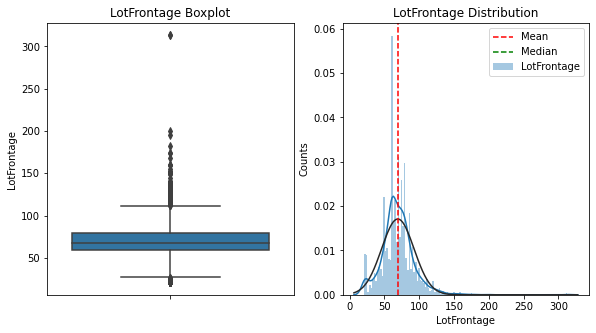

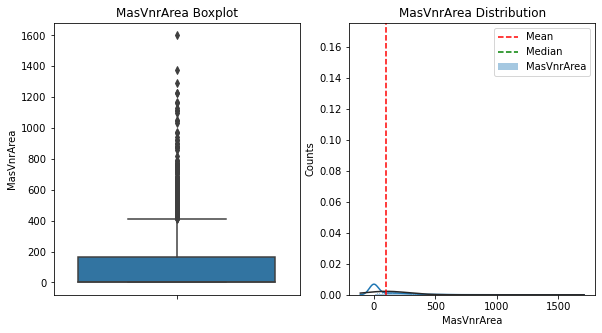

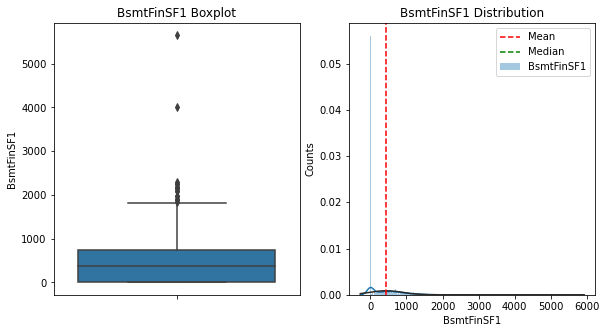

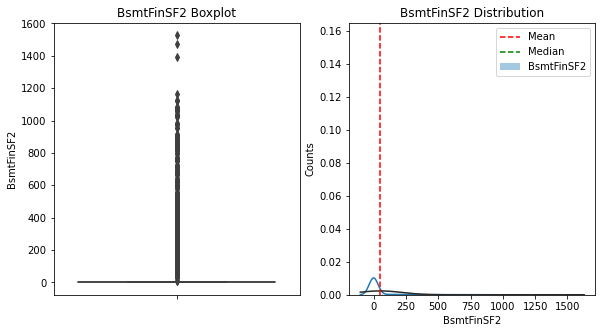

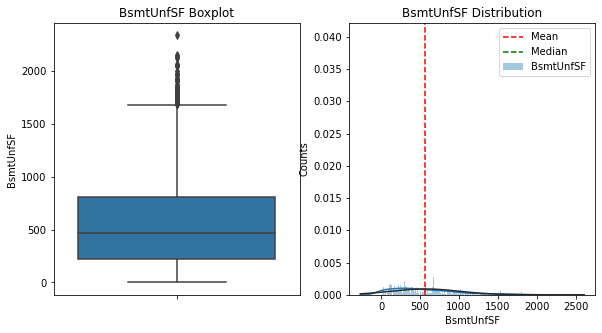

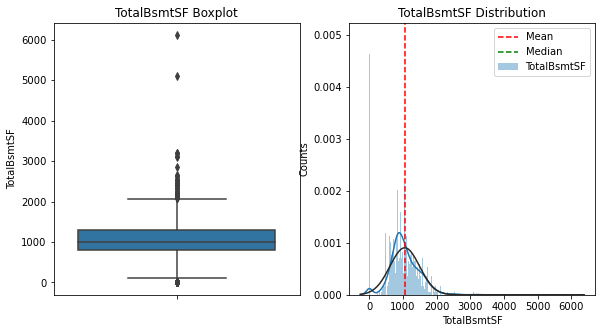

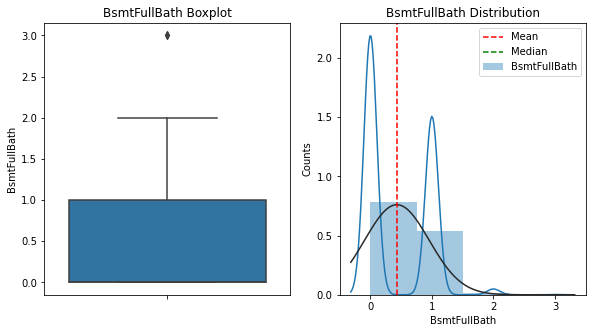

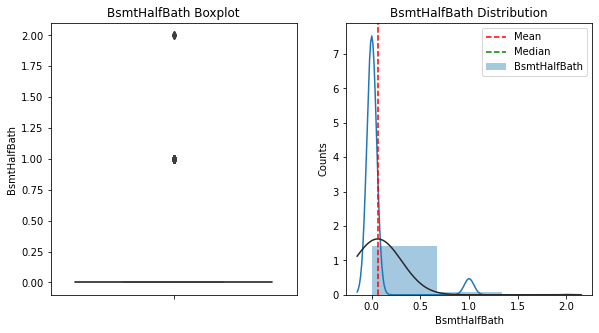

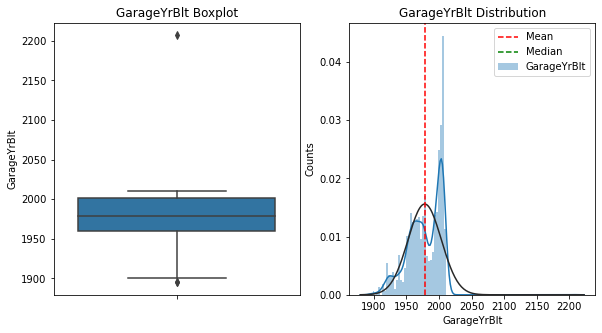

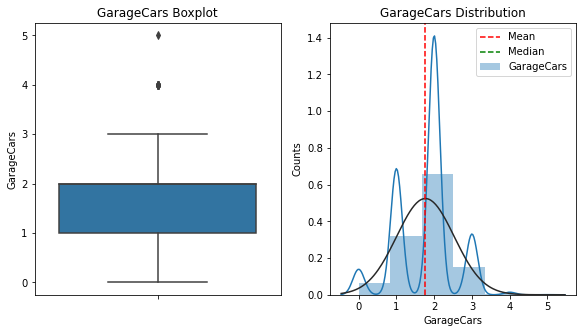

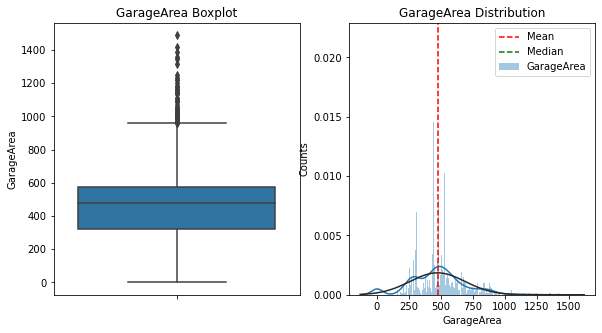

In [32]:
# First let us check the plots for the numerical features those need to processed by imputation techniques for missing value

for i in num_imp.index:
    BoxDist(numerical_data, i)

In [33]:
# Replacing Null Values with Median Values per Numerical Feature as all having outlier

for i in numerical_data.columns:
    numerical_data[i] = numerical_data[i].fillna(numerical_data[i].median())

In [34]:
# Cross-checking total Null Values present per Features for Numerical Variables

numerical_data[num_imp.index].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

# Sec-III
# Handling Outliers

In [35]:
# We know that some features contains outliers, but removing outliers in this stage may lead to loss of information
# Later, prior model buliding we'll handle this by scaling or transformation

# We'll not remove outliers now!

# As dataset conatins many more features, we need to check for multi-collinearity

In [36]:
# Checking final shape of categorical & numerical data: 

print(categorical_data.shape)
print(numerical_data.shape)

(2919, 43)
(2919, 31)


In [37]:
del cat_imp, cat_ord_var, categorical_data_drop
del num_imp, numerical_data_drop

In [38]:
numerical_features = numerical_data.columns
categorical_features = categorical_data.columns

In [39]:
print('numerical_features:', numerical_features)

numerical_features: Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')


In [40]:
print('categorical_features:', categorical_features)

categorical_features: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual',
       'OverallCond', 'MoSold', 'YrSold'],
      dtype='object')


# Sec-IV
# Encoding of Categorical Variables

In [41]:
encoded_cat_data = pd.get_dummies(data=categorical_data)

In [42]:
encoded_cat_data.shape

(2919, 286)

In [43]:
encoded_cat_data.head(15)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Sec-V
# EDA

In [44]:
# Segregating Train & Test dataset

numerical_train = numerical_data[:len(train_data)]
numerical_test = numerical_data[len(train_data):]

cat_encoded_train = encoded_cat_data[:len(train_data)]
cat_encoded_test = encoded_cat_data[len(train_data):]

In [45]:
print(numerical_train.shape)
print(numerical_test.shape)
print(cat_encoded_train.shape)
print(cat_encoded_test.shape)

(1460, 31)
(1459, 31)
(1460, 286)
(1459, 286)


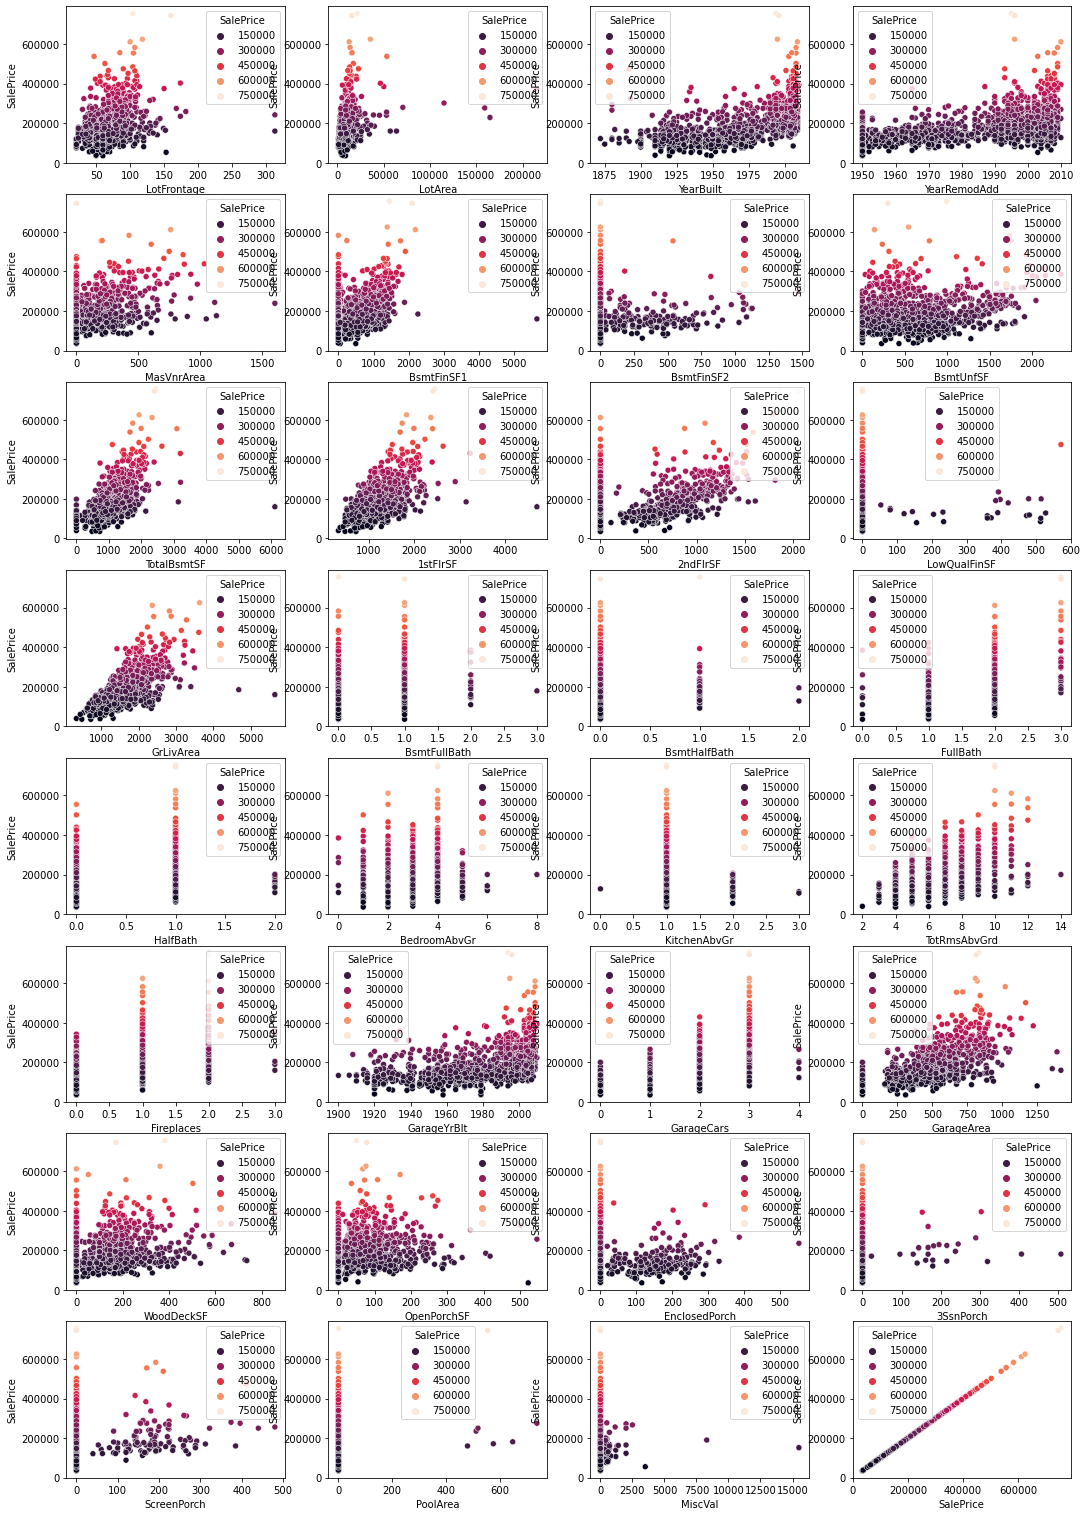

In [46]:
# Plots of Numerical Features vs Response Variable

numerical_train['SalePrice'] = y
fig, axs = plt.subplots( figsize=(18, 110))
for i, col in enumerate(numerical_train.columns, 1):
    plt.subplot(numerical_train.shape[1], 4, i)
    sns.scatterplot(data=numerical_train, x=col, y='SalePrice', hue='SalePrice', palette="rocket")

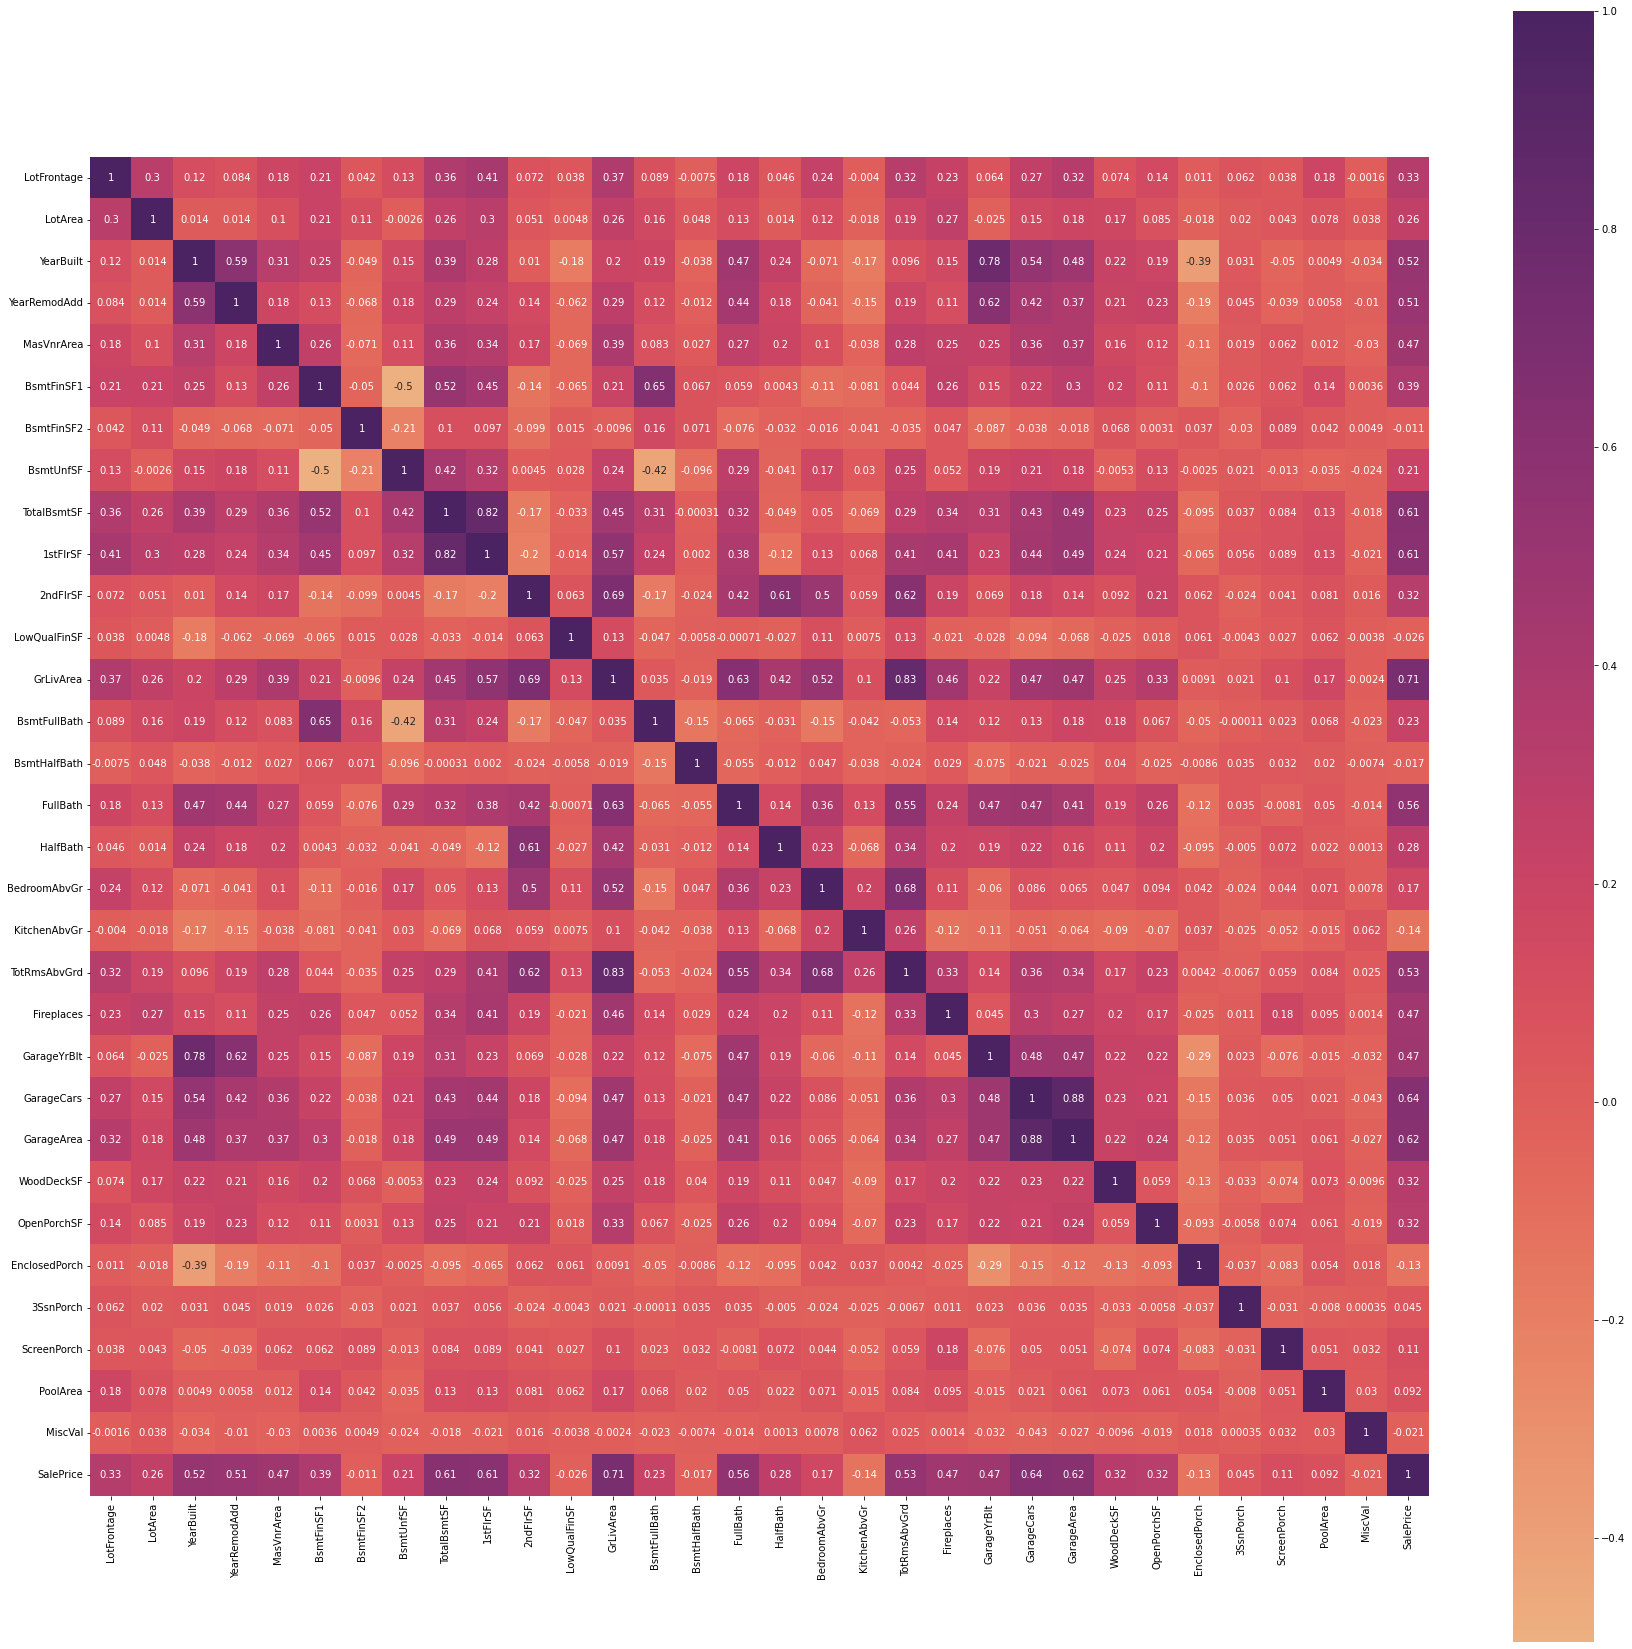

In [47]:
corr_matrix_num = numerical_train.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix_num, annot=True, square=True, cmap='flare')
plt.show()

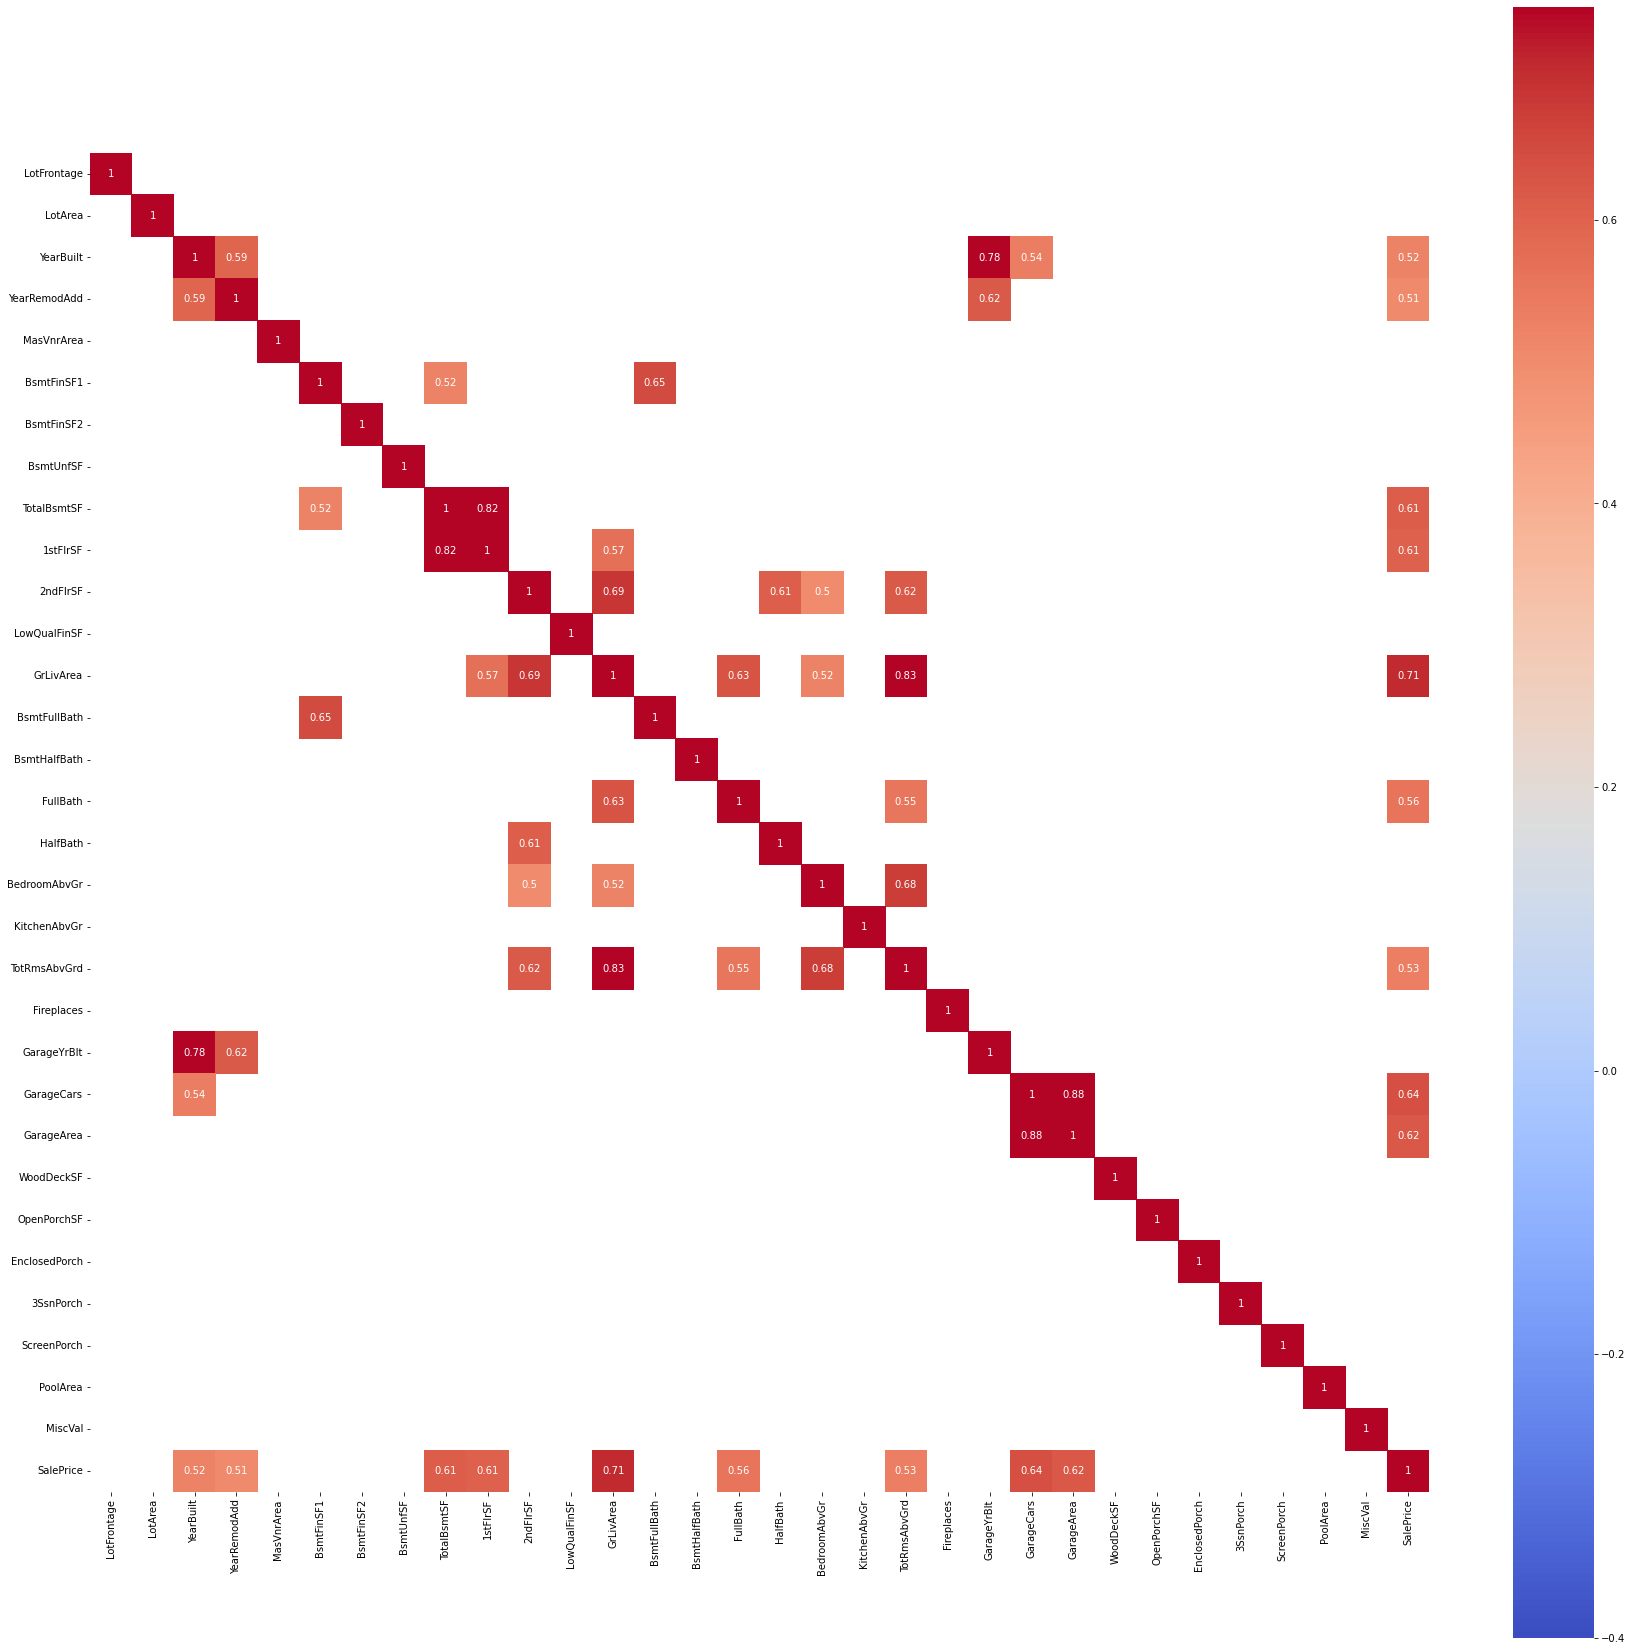

In [48]:
# Checking for correlation >0.5

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix_num[abs(corr_matrix_num)>0.5], annot=True, square=True, cmap='coolwarm', vmax=0.75, vmin=-0.4)
plt.show()

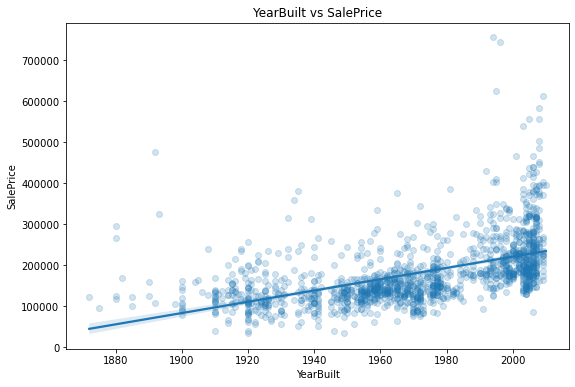

In [49]:
# There are few features relatively high correlation with SalePrice

plt.figure(figsize=(9,6))
sns.regplot(data=numerical_train, x='YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt'+' vs '+'SalePrice', fontsize=12)
plt.show()

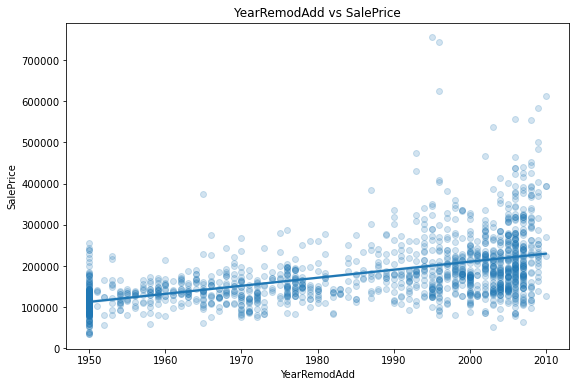

In [50]:
plt.figure(figsize=(9,6))
sns.regplot(data=numerical_train, x='YearRemodAdd', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearRemodAdd'+' vs '+'SalePrice', fontsize=12)
plt.show()

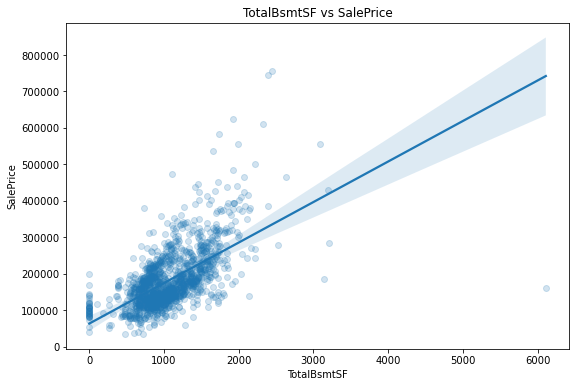

In [51]:
plt.figure(figsize=(9,6))
sns.regplot(data=numerical_train, x='TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF'+' vs '+'SalePrice', fontsize=12)
plt.show()

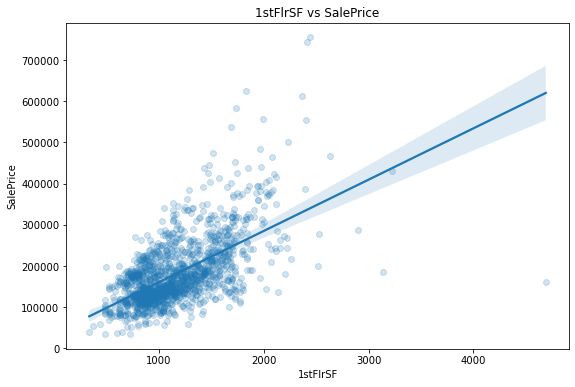

In [52]:
plt.figure(figsize=(9,6))
sns.regplot(data=numerical_train, x='1stFlrSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('1stFlrSF'+' vs '+'SalePrice', fontsize=12)
plt.show()

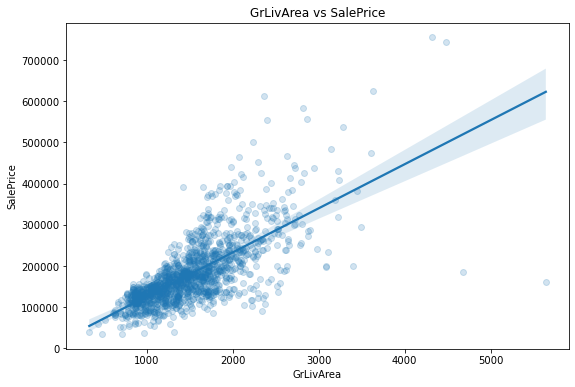

In [53]:
plt.figure(figsize=(9,6))
sns.regplot(data=numerical_train, x='GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea'+' vs '+'SalePrice', fontsize=12)
plt.show()

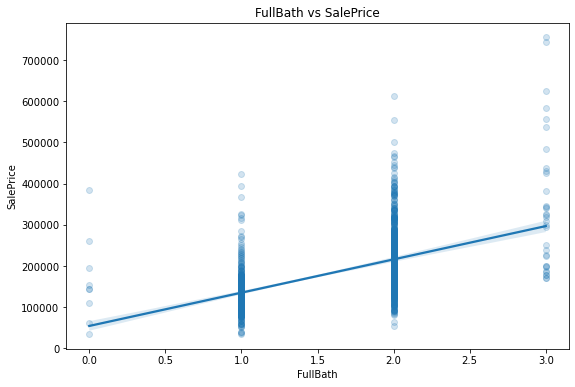

In [54]:
plt.figure(figsize=(9,6))
sns.regplot(data=numerical_train, x='FullBath', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('FullBath'+' vs '+'SalePrice', fontsize=12)
plt.show()

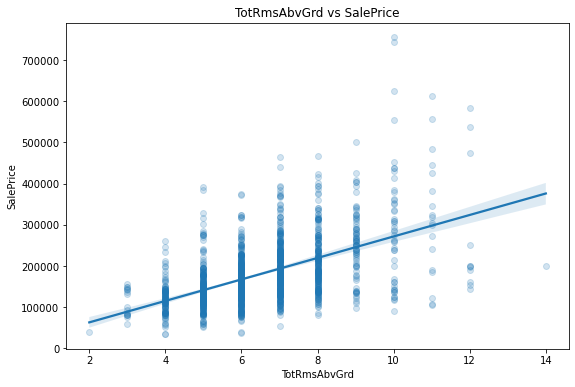

In [55]:
plt.figure(figsize=(9,6))
sns.regplot(data=numerical_train, x='TotRmsAbvGrd', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotRmsAbvGrd'+' vs '+'SalePrice', fontsize=12)
plt.show()

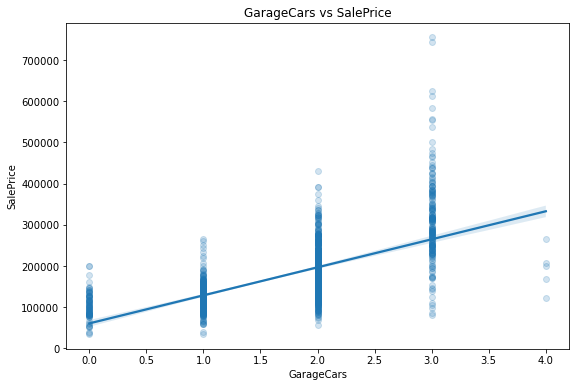

In [56]:
plt.figure(figsize=(9,6))
sns.regplot(data=numerical_train, x='GarageCars', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GarageCars'+' vs '+'SalePrice', fontsize=12)
plt.show()

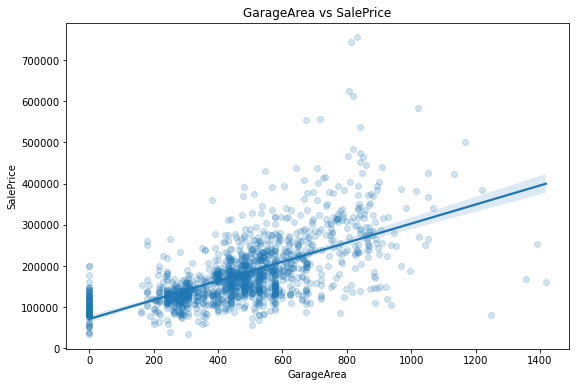

In [57]:
plt.figure(figsize=(9,6))
sns.regplot(data=numerical_train, x='GarageArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GarageArea'+' vs '+'SalePrice', fontsize=12)
plt.show()

In [58]:
# Creating Function for distribution plot and q-q plot

def plot_feature(df, feature):
    
    fig, axs = plt.subplots( figsize=(16, 8))
        
    plt.subplot(1, 2, 1)
    (mu, sigma) = stats.norm.fit(df[feature])
    sns.distplot(df[feature], kde=True, hist=True, fit=stats.norm, color="b")
    plt.title(feature + 'Distribution vs Normal Distribution', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency %", fontsize=12)
    plt.legend(['Distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='upper center')
    
    plt.subplot(1, 2, 2)
    observation = df[feature]
    z = (observation-np.mean(observation))/np.std(observation)
    stats.probplot(z, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot of " + feature, fontsize=16)
    
    plt.show()
    


In [59]:
y = pd.DataFrame(y)

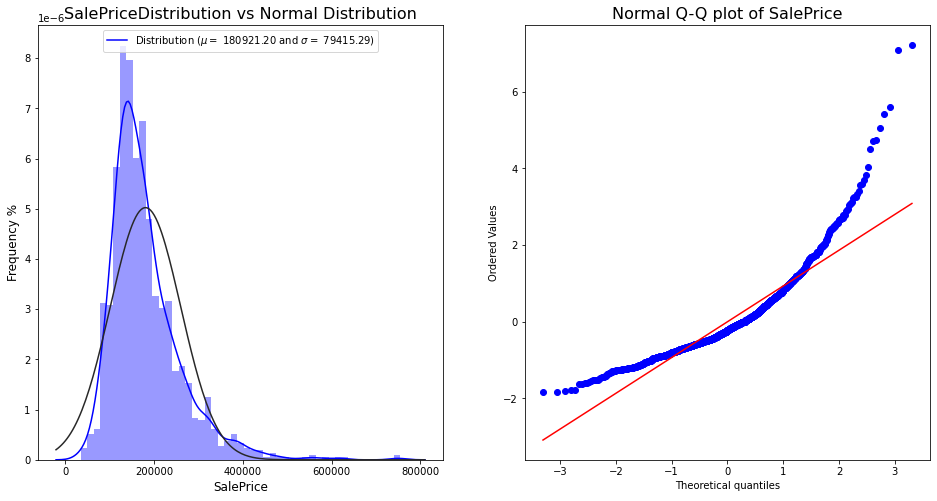

In [60]:
plot_feature(y, 'SalePrice')

In [61]:
# from above q-q plot it can be seen that response variable required a transformation

y['LogSalePrice'] = y.SalePrice.apply(np.log10)

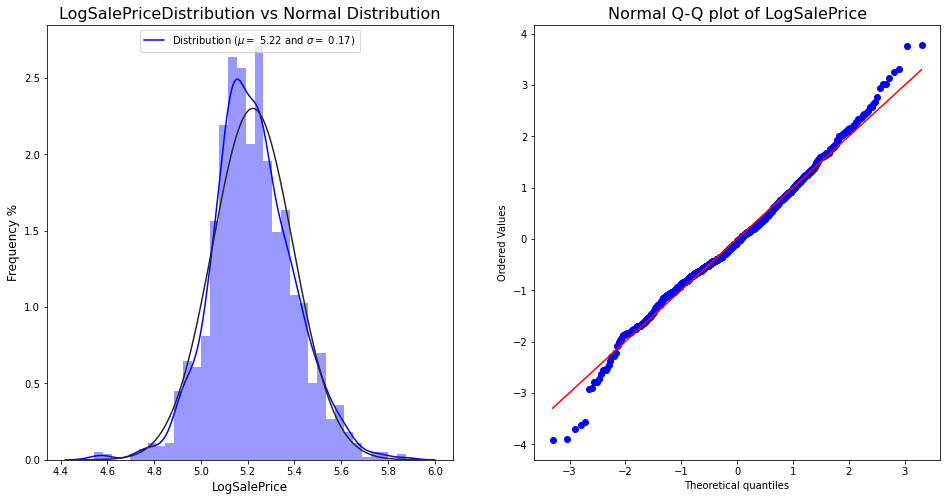

In [62]:
plot_feature(y, 'LogSalePrice')

In [63]:
# Now, log-transformed response variable will be our new response variable, hence we can remove 'SalePrice'
y.drop(columns=['SalePrice'], axis=1, inplace=True)
print(y.shape)

numerical_train.drop(columns=['SalePrice'], axis=1, inplace=True)
print(numerical_train.shape)

(1460, 1)
(1460, 31)


In [64]:
print(cat_encoded_train.shape)
print(numerical_train.shape)

(1460, 286)
(1460, 31)


In [65]:
num_predictors = numerical_train.columns
numerical_test = numerical_test[num_predictors]

In [66]:
print(cat_encoded_test.shape)
print(numerical_test.shape)

(1459, 286)
(1459, 31)


In [67]:
dataset_train = pd.concat([numerical_train, cat_encoded_train], axis=1, ignore_index=False, verify_integrity=True)
dataset_train.shape

(1460, 317)

In [68]:
dataset_test = pd.concat([numerical_test, cat_encoded_test], axis=1, ignore_index=False, verify_integrity=True)
dataset_test.shape

(1459, 317)

# Sec-VI
# Model Building

### Preparing Input Dataset

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset_train)
X_train = pd.DataFrame(dataset_scaled, columns=[dataset_train.columns])

dataset_scaled = scaler.fit_transform(dataset_test)
X_test = pd.DataFrame(dataset_scaled, columns=[dataset_test.columns])

print(X_train.shape)
print(y.shape)
print(X_test.shape)

(1460, 317)
(1460, 1)
(1459, 317)



### Model Building through Ensemble Method

In [70]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
import statsmodels.api as sma
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [71]:
kf_inner = KFold(n_splits=5, shuffle=True, random_state=123).get_n_splits(X_train)
kf_outer = KFold(n_splits=15, shuffle=True, random_state=123).get_n_splits(X_train)

In [73]:
%%time

model_lr = LinearRegression(normalize=True)

result = model_lr.fit(X_train, y)
scores = -cross_val_score(model_lr, X_train, y, cv=kf_outer, scoring='neg_root_mean_squared_error')

print("RMSE: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), type(model_lr).__name__))

RMSE: 12273474294476.81250 (+/- 14887481236478.60) [LinearRegression]
Wall time: 4.1 s


In [74]:
%%time

model_ridge = Ridge(normalize=True, random_state=123)
param = dict()
param['alpha'] = [0.35, 0.38, 0.4]
param['solver'] = ['lsqr', 'sag', 'saga', 'lbfgs']

search = GridSearchCV(model_ridge, param, scoring='neg_root_mean_squared_error', n_jobs=1, cv=kf_inner, refit=True)
result = search.fit(X_train, y)
scores = -cross_val_score(model_ridge, X_train, y, cv=kf_outer, scoring='neg_root_mean_squared_error')

print(f'Best {type(model_ridge).__name__} Parameter(s): {result.best_params_}')
print("RMSE: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), type(model_ridge).__name__))

Best Ridge Parameter(s): {'alpha': 0.4, 'solver': 'sag'}
RMSE: 0.05992 (+/- 0.02) [Ridge]
Wall time: 11.5 s


In [75]:
%%time

model_lcv = LassoCV(cv=kf_inner, max_iter=1000, random_state=123)
param = dict()
param['eps'] = [0.001, 0.0005, 0.0002]
param['n_alphas'] = [80, 100, 120]

search = GridSearchCV(model_lcv, param, scoring='neg_root_mean_squared_error', n_jobs=1, cv=kf_inner, refit=True)
result = search.fit(X_train, y)
scores = -cross_val_score(model_lcv, X_train, y, cv=kf_outer, scoring='neg_root_mean_squared_error')

print(f'Best {type(model_lcv).__name__} Parameter(s): {result.best_params_}')
print("RMSE: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), type(model_lcv).__name__))

Best LassoCV Parameter(s): {'eps': 0.001, 'n_alphas': 100}
RMSE: 0.05844 (+/- 0.02) [LassoCV]
Wall time: 1min 30s


In [76]:
%%time

model_rfr = RandomForestRegressor(warm_start=True, random_state=123)
param = dict()
param['n_estimators'] = [500, 1000]
param['max_features'] = [5, 8, 10]
param['max_depth'] = [6, 8, 10]
param['ccp_alpha'] = [0.0001, 0.00005, 0.00001]
param['min_samples_split'] = [2, 4, 6]

search = GridSearchCV(model_rfr, param, scoring='neg_root_mean_squared_error', n_jobs=1, cv=kf_inner, refit=True)
result = search.fit(X_train, y)
scores = -cross_val_score(model_rfr, X_train, y, cv=kf_outer, scoring='neg_root_mean_squared_error')

print(f'Best {type(model_rfr).__name__} Parameter(s): {result.best_params_}')
print("RMSE: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), type(model_rfr).__name__))

Best RandomForestRegressor Parameter(s): {'ccp_alpha': 1e-05, 'max_depth': 10, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 1000}
RMSE: 0.06173 (+/- 0.01) [RandomForestRegressor]
Wall time: 53min 57s


In [77]:
%%time

model_gbr = GradientBoostingRegressor(warm_start=True, random_state=123)
param = dict()
param['n_estimators'] = [100, 200, 500]
param['max_features']=[4, 5, 8]
param['learning_rate'] = [0.03, 0.05, 0.06]
param['min_samples_split'] = [4, 6, 8]
param['max_depth'] = [6, 8, 10]
param['ccp_alpha'] = [0.0001, 0.0005, 0.001]

search = GridSearchCV(model_gbr, param, scoring='neg_root_mean_squared_error', n_jobs=1, cv=kf_inner, refit=True)
result = search.fit(X_train, y)
scores = -cross_val_score(model_gbr, X_train, y, cv=kf_outer, scoring='neg_root_mean_squared_error')

print(f'Best {type(model_gbr).__name__} Parameter(s): {result.best_params_}')
print("RMSE: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), type(model_gbr).__name__))

Best GradientBoostingRegressor Parameter(s): {'ccp_alpha': 0.0001, 'learning_rate': 0.06, 'max_depth': 6, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 500}
RMSE: 0.05548 (+/- 0.01) [GradientBoostingRegressor]
Wall time: 34min 1s


In [78]:
%%time

model_xgbr = XGBRegressor(n_estimators=1000, learning_rate=0.025, gamma=0.00001, reg_lambda=0.38,
                          min_child_weight=12, subsample=0.8, random_state=123)

result = model_xgbr.fit(X_train, y)
scores = -cross_val_score(model_xgbr, X_train, y, cv=kf_outer, scoring='neg_root_mean_squared_error')

print("RMSE: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), type(model_xgbr).__name__))

RMSE: 0.05452 (+/- 0.01) [XGBRegressor]
Wall time: 2min 57s


In [80]:
%%time

# Different Regression Models - Base Models

stacking_CV_reg_1 = StackingCVRegressor(regressors=[model_lcv, model_ridge], 
                                 meta_regressor=model_rfr, cv=10, use_features_in_secondary=True, random_state=123)

print('15-fold cross validation scores:\n')

for reg, label in zip([model_lcv, model_ridge, model_rfr, stacking_CV_reg_1], ['LassoCV Regressor', 'Ridge Regressor', 'RF Regressor', 'StackingCVRegressor-1']):
    
    scores = -cross_val_score(reg, X_train, y, cv=kf_outer, scoring='neg_root_mean_squared_error')
    
    print("RMSE: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

15-fold cross validation scores:

RMSE: 0.05844 (+/- 0.02) [LassoCV Regressor]
RMSE: 0.05992 (+/- 0.02) [Ridge Regressor]
RMSE: 0.06173 (+/- 0.01) [RF Regressor]
RMSE: 0.05373 (+/- 0.01) [StackingCVRegressor-1]
Wall time: 7min 11s


In [81]:
%%time

# Different Regression Models - Base Models

stacking_CV_reg_2 = StackingCVRegressor(regressors=[model_gbr, model_xgbr],
                                 meta_regressor=model_rfr, cv=10, use_features_in_secondary=True, random_state=123)

print('15-fold cross validation scores:\n')

for reg, label in zip([model_gbr, model_xgbr, model_rfr, stacking_CV_reg_2], 
                      ['GB Regressor', 'XGB Regressor', 'RF Regressor', 'StackingCVRegressor-2']):
    
    scores = -cross_val_score(reg, X_train, y, cv=kf_outer, scoring='neg_root_mean_squared_error')
    
    print("RMSE: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


15-fold cross validation scores:

RMSE: 0.05548 (+/- 0.01) [GB Regressor]
RMSE: 0.05452 (+/- 0.01) [XGB Regressor]
RMSE: 0.06173 (+/- 0.01) [RF Regressor]
RMSE: 0.05306 (+/- 0.01) [StackingCVRegressor-2]
Wall time: 32min 46s


In [82]:
%%time

# Different Regression Models - Base Models

stacking_CV_reg_3 = StackingCVRegressor(regressors=[model_ridge, model_lcv, model_gbr, model_xgbr],
                                 meta_regressor=model_rfr, cv=10, use_features_in_secondary=True, random_state=123)

print('15-fold cross validation scores:\n')

for reg, label in zip([model_ridge, model_lcv, model_gbr, model_xgbr, model_rfr, stacking_CV_reg_3], 
                      ['Ridge Regressor', 'LassoCV Regressor', 'GB Regressor', 'XGB Regressor', 'RF Regressor', 'StackingCVRegressor-3']):
    
    scores = -cross_val_score(reg, X_train, y, cv=kf_outer, scoring='neg_root_mean_squared_error')
    
    print("RMSE: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


15-fold cross validation scores:

RMSE: 0.05992 (+/- 0.02) [Ridge Regressor]
RMSE: 0.05844 (+/- 0.02) [LassoCV Regressor]
RMSE: 0.05548 (+/- 0.01) [GB Regressor]
RMSE: 0.05452 (+/- 0.01) [XGB Regressor]
RMSE: 0.06173 (+/- 0.01) [RF Regressor]
RMSE: 0.05178 (+/- 0.01) [StackingCVRegressor-3]
Wall time: 28min 34s


In [83]:
# Here we need to pass dataset without scaling, hence

_X_train = dataset_train
_y = y

_X_test = dataset_test

print(_X_train.shape)
print(_y.shape)
print(_X_test.shape)

(1460, 317)
(1460, 1)
(1459, 317)


In [84]:
# Applying PCA in final model

_sc = StandardScaler()
_pca = PCA(n_components = None)
_model = stacking_CV_reg_3
stack_model = Pipeline([
 ('std_scaler', _sc),
 ('pca', _pca),
 ('regressor', _model)
])


In [85]:
%%time

result = stack_model.fit(_X_train, _y)
scores = -cross_val_score(stack_model, _X_train, _y, cv=kf_outer, scoring='neg_root_mean_squared_error')

print("RMSE: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), type(stack_model).__name__))

RMSE: 0.06045 (+/- 0.01) [Pipeline]
Wall time: 3h 15min 11s


In [86]:
# Among all 'StackingCVRegressor-3' is giving best result hence, choosing it as final model

final_model = stacking_CV_reg_3

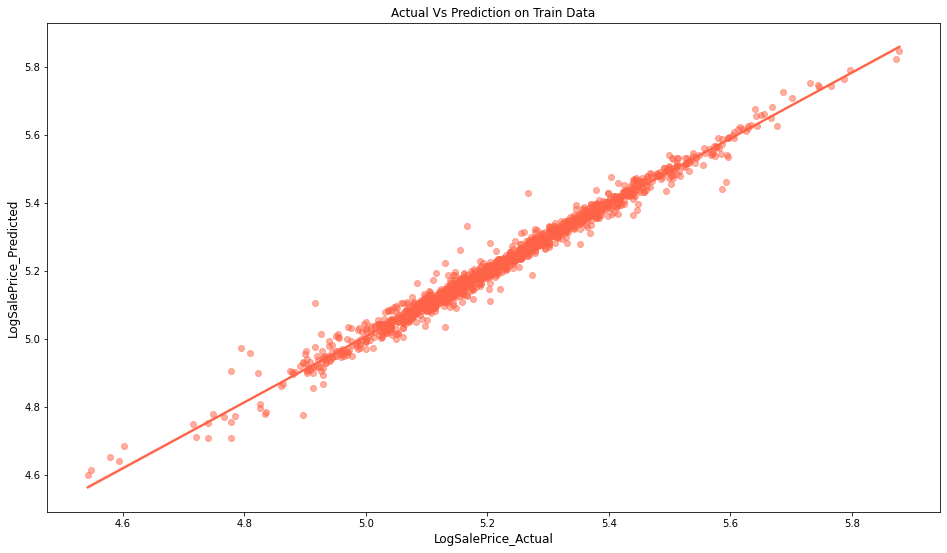

In [87]:
# Reg Plot of Actual Vs Predicted Response Variable by statsmodels.regression.linear_model>>OLS
final_model.fit(X_train, y)
y_pred = final_model.predict(X_train)

plt.figure(figsize=(16,9))

sns.regplot(x=y, y=y_pred, scatter_kws={'alpha':0.5}, color='tomato')
plt.xlabel('LogSalePrice_Actual', fontsize=12)
plt.ylabel('LogSalePrice_Predicted', fontsize=12)
plt.title('Actual Vs Prediction on Train Data')

plt.show()

# Part-VII
## Prediction of SalePrice from 'test' data using best model

In [89]:
# Creating DataFrame of Test Prediction

test_pred = final_model.predict(X_test)

In [90]:
# Creating csv file by adding a column of predicted SalePrice with availavle test data

sub_data['SalePrice'] = 10**test_pred
sub_data.set_index('Id', inplace=True)

print('Printing shape of Test Dataset: ', test_data.shape)
print('Printing shape of Submission Dataset: ', sub_data.shape)

Printing shape of Test Dataset:  (1459, 80)
Printing shape of Submission Dataset:  (1459, 1)


In [91]:
sub_data.head(15)

,SalePrice
Id,
1461,124055.314030
1462,156050.202356
1463,185083.917172
1464,201041.423961
1465,193467.412940
1466,173921.232622
1467,182126.995197
1468,172428.266543
1469,188669.239300


In [92]:
# Exporting Predicted data to CSV File

sub_data.to_csv('submission.csv')

## -----------------------------------------------E  N  D--------------------------------------------------------